In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#I only had 16 cols in the first app_id scrape, some rows have 18 so need to specify cols to retrieve

In [16]:
columns = ['app_id', 'dlc', 'recommendationid', 'author', 'language', 'review', 
           'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 
           'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 
           'received_for_free', 'written_during_early_access']

In [18]:
dlc_df = pd.read_csv('/Users/alison/Desktop/GA/DSI15-lessons/project/project-capstone/Capstone Steam/data/download/steam_dlc_reviews.csv', 
                     usecols = columns , encoding= 'utf-8')

In [19]:
dlc_df.shape

(140554, 16)

In [20]:
dlc_df.duplicated().sum()

92164

In [21]:
dlc_df.drop_duplicates(keep='first', inplace=True)

In [22]:
dlc_df.shape

(48390, 16)

In [23]:
dlc_df.app_id.value_counts()

247303    115
394320    112
213780    112
327830    112
426321    111
         ... 
219097      1
348090      1
307825      1
420490      1
574670      1
Name: app_id, Length: 5888, dtype: int64

In [24]:
dlc_df.isnull().sum()

app_id                          0
dlc                             0
recommendationid                0
author                          0
language                        0
review                         31
timestamp_created               0
timestamp_updated               0
voted_up                        0
votes_up                        0
votes_funny                     0
weighted_vote_score             0
comment_count                   0
steam_purchase                  0
received_for_free               0
written_during_early_access     0
dtype: int64

In [25]:
dlc_df.reset_index(drop=True, inplace=True)

In [26]:
dlc_df.head()

,app_id,dlc,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,1256,1,23698284,"{'steamid': '76561197963558222', 'num_games_ow...",english,"I got this back in 2010 and it was around $2, ...",1466566487,1466566487,False,51,1,0.781742,3,True,False,False
1,1256,1,13871472,"{'steamid': '76561198044217796', 'num_games_ow...",english,DJ Scully nuff said.,1420584436,1420584436,True,23,4,0.707484,0,True,False,False
2,1256,1,2722792,"{'steamid': '76561198011647032', 'num_games_ow...",english,These Killing Floor characters really adds to ...,1323402878,1323402878,True,22,2,0.659986,0,True,False,False
3,1256,1,15154600,"{'steamid': '76561198023430257', 'num_games_ow...",english,Guy in a HaZmat suit... cool\nSome guy with so...,1427894740,1427894740,True,7,10,0.593850,0,True,False,False
4,1256,1,640873,"{'steamid': '76561197973951600', 'num_games_ow...",english,This DLC has the best looking character models...,1292376412,1292376412,True,9,0,0.591672,0,True,False,False


In [65]:
dlc_df.author[0]

"{'steamid': '76561197963558222', 'num_games_owned': 251, 'num_reviews': 15, 'playtime_forever': 0, 'playtime_last_two_weeks': 0, 'last_played': 0}"

In [66]:
dlc_df.app_id[47130]

588830

In [70]:
dlc_df[dlc_df.app_id == 588830]

,app_id,dlc,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
47130,588830,1,35073972,"{'steamid': '76561198027180717', 'num_games_ow...",english,k,1505863152,1505863152,True,2,0,0.408111,0,True,False,False
47131,588830,1,76286403,"{'steamid': '76561198137285867', 'num_games_ow...",english,6/10,1600617070,1600617070,True,0,0,0.000000,0,True,False,False


In [28]:
dlc_df[['review_created', 'review_updated']] = dlc_df[['timestamp_created', 'timestamp_updated']].\
apply(pd.to_datetime, unit = 's')

In [29]:
dlc_df.head()

,app_id,dlc,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,review_created,review_updated
0,1256,1,23698284,"{'steamid': '76561197963558222', 'num_games_ow...",english,"I got this back in 2010 and it was around $2, ...",1466566487,1466566487,False,51,1,0.781742,3,True,False,False,2016-06-22 03:34:47,2016-06-22 03:34:47
1,1256,1,13871472,"{'steamid': '76561198044217796', 'num_games_ow...",english,DJ Scully nuff said.,1420584436,1420584436,True,23,4,0.707484,0,True,False,False,2015-01-06 22:47:16,2015-01-06 22:47:16
2,1256,1,2722792,"{'steamid': '76561198011647032', 'num_games_ow...",english,These Killing Floor characters really adds to ...,1323402878,1323402878,True,22,2,0.659986,0,True,False,False,2011-12-09 03:54:38,2011-12-09 03:54:38
3,1256,1,15154600,"{'steamid': '76561198023430257', 'num_games_ow...",english,Guy in a HaZmat suit... cool\nSome guy with so...,1427894740,1427894740,True,7,10,0.593850,0,True,False,False,2015-04-01 13:25:40,2015-04-01 13:25:40
4,1256,1,640873,"{'steamid': '76561197973951600', 'num_games_ow...",english,This DLC has the best looking character models...,1292376412,1292376412,True,9,0,0.591672,0,True,False,False,2010-12-15 01:26:52,2010-12-15 01:26:52


In [59]:
df2 = pd.json_normalize(dlc_df['author'].apply(eval))

In [60]:
df2

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review
0,76561197963558222,251,15,0,0,0,NaN
1,76561198044217796,125,8,0,0,0,NaN
2,76561198011647032,11675,502,0,0,0,NaN
3,76561198023430257,489,302,0,0,0,NaN
4,76561197973951600,425,21,0,0,0,NaN
...,...,...,...,...,...,...,...
48385,76561198065785428,485,14,0,0,0,NaN
48386,76561197967439706,292,4,0,0,0,NaN
48387,76561197993840491,380,78,0,0,0,NaN
48388,76561198310312055,42,53,0,0,0,NaN


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

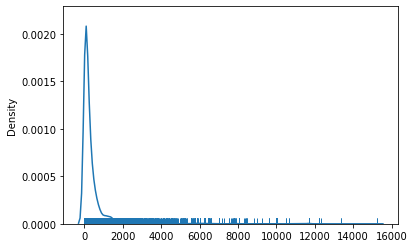

In [18]:
sns.distplot(df2[['num_games_owned']], hist=False, rug=True)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

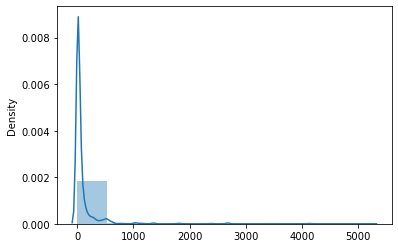

In [23]:
sns.distplot(df2[['num_reviews']], hist=True, bins=10)

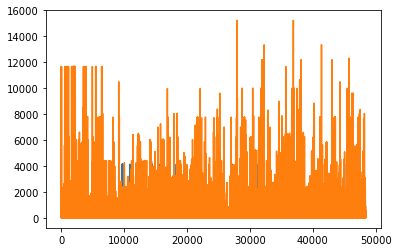

In [26]:
df2['num_reviews'].plot()
df2['num_games_owned'].plot()
plt.show()

<AxesSubplot:xlabel='num_reviews', ylabel='num_games_owned'>

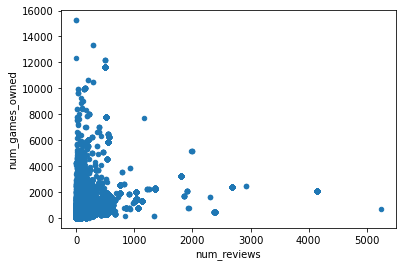

In [31]:
df2.plot.scatter(x = 'num_reviews', y= 'num_games_owned')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48390 entries, 0 to 48389
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   steamid                  48390 non-null  object 
 1   num_games_owned          48390 non-null  int64  
 2   num_reviews              48390 non-null  int64  
 3   playtime_forever         48390 non-null  int64  
 4   playtime_last_two_weeks  48390 non-null  int64  
 5   last_played              48390 non-null  int64  
 6   playtime_at_review       129 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 2.6+ MB


In [38]:
df2[df2.num_reviews > 1000]

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review
37,76561198016046767,1428,1026,0,0,0,NaN
173,76561198053229942,1299,1018,0,0,0,NaN
203,76561198053229942,1299,1018,0,0,0,NaN
227,76561198053229942,1299,1018,0,0,0,NaN
263,76561198053229942,1299,1018,0,0,0,NaN
...,...,...,...,...,...,...,...
47991,76561198066590240,5170,1985,0,0,0,NaN
48121,76561198043135631,2274,1356,0,0,0,NaN
48141,76561198043135631,2278,1356,0,0,0,NaN
48156,76561198043135631,2274,1356,0,0,0,NaN


In [ ]:
playtime_forever, playtime_last_two_weeks, last_played doesn't count times for dlcs - only looks at the main game

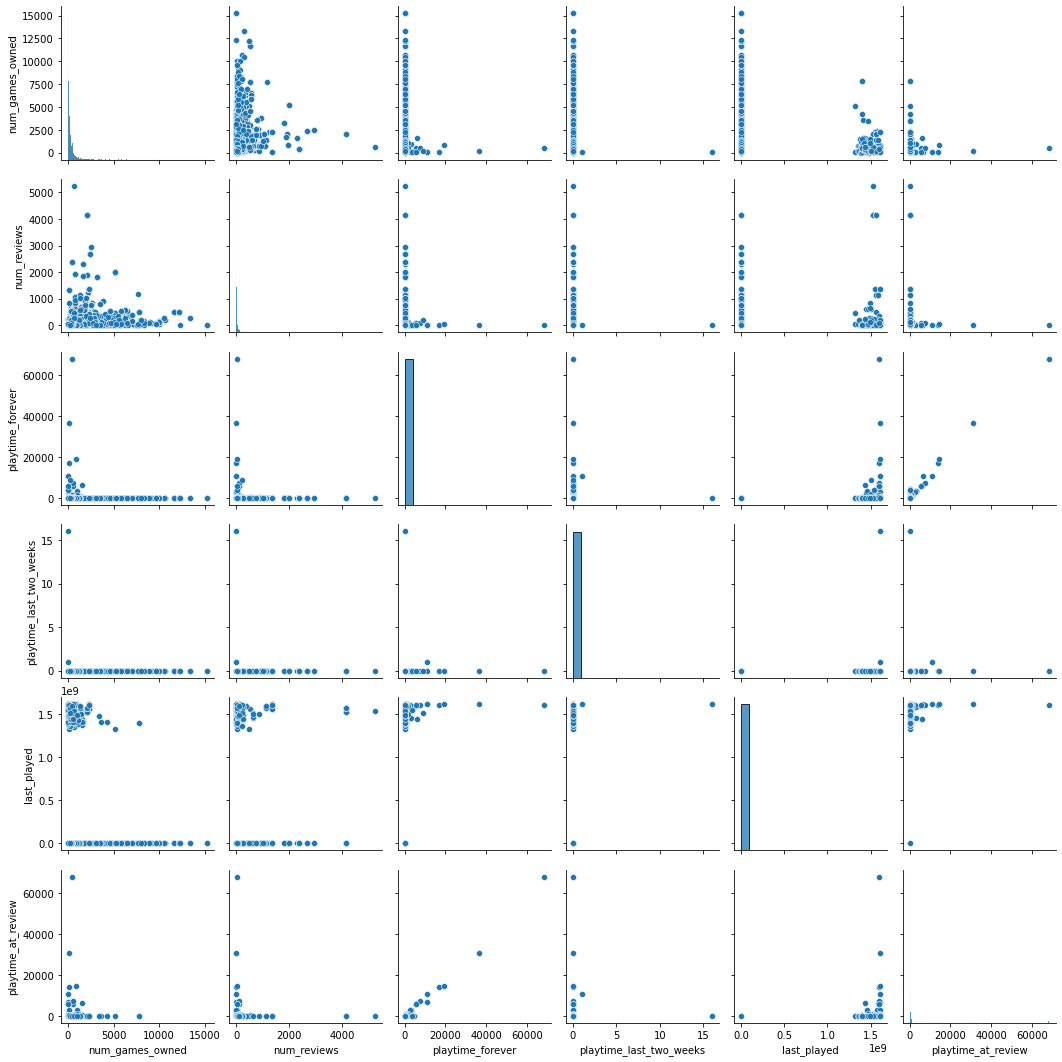

In [37]:
sns.pairplot(df2)

In [61]:
df2[df2.playtime_forever > 0]
#when inspecting these in the game store, altho they were labeled as a DLC beforehand, not actually DLCs 187 games mislabeled

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review
54,76561197997602124,799,43,15,0,86400,15.0
55,76561198149672813,180,16,6,0,1562948873,NaN
56,76561197993324433,404,74,1,0,1429728361,NaN
57,76561198050382401,121,13,13,0,1583472785,5.0
58,76561198799786139,15,2,1,0,1583206682,NaN
...,...,...,...,...,...,...,...
40650,76561198043135631,2274,1356,5,0,1607395041,5.0
42340,76561197990705923,3416,67,6,0,1472658980,6.0
46134,76561198125392509,658,5236,16,0,1530052344,16.0
47130,76561198027180717,186,200,8873,0,1505864106,NaN


In [71]:
#Author column is a dictionary - expanding this out into new columns and concatenate to original df, drop author
df3 = pd.concat([dlc_df, pd.json_normalize(dlc_df['author'].apply(eval))], axis=1)

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48390 entries, 0 to 48389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   app_id                       48390 non-null  int64  
 1   dlc                          48390 non-null  int64  
 2   recommendationid             48390 non-null  int64  
 3   author                       48390 non-null  object 
 4   language                     48390 non-null  object 
 5   review                       48359 non-null  object 
 6   timestamp_created            48390 non-null  int64  
 7   timestamp_updated            48390 non-null  int64  
 8   voted_up                     48390 non-null  bool   
 9   votes_up                     48390 non-null  int64  
 10  votes_funny                  48390 non-null  int64  
 11  weighted_vote_score          48390 non-null  float64
 12  comment_count                48390 non-null  int64  
 13  steam_purchase  

In [ ]:
in game df the detailed description is an expanded about - so can drop this after checking for nans
maybe also look into just using the short description

In [ ]:
as you cannot calculate dlc playtime, had to link up the original game playtime and get the total time played for the game
however might then not have any relationship to the dlc? can use eda to explore this - eg does playtime of a game go up with increase in dlcs?